In [102]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, classification_report, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import BernoulliRBM, MLPClassifier

In [170]:
df = pd.read_csv("../data/clean_data_final.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed,harmonized_salary,adjusted_annual_salary
0,3,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed,55000.0,0.885018
1,0,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed,68796.0,1.793468
2,0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed,34000.0,0.547102
3,0,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed,62000.0,0.997657
4,0,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed,60000.0,0.965475
...,...,...,...,...,...,...,...,...,...,...
22883,0,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed,85000.0,1.367756
22884,2,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed,40000.0,0.643650
22885,2,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,very well payed,148000.0,2.381504
22886,0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed,65000.0,1.045931


In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    df[
        [
            "how_old_are_you",
            "years_of_experience_in_field",
            "highest_level_of_education_completed",
            "gender",
            "industry",
            "cluster",
            "payed",
            #"adjusted_annual_salary",
        ]
    ],
    df[["payed", "harmonized_salary"]],
    train_size=0.8,
    random_state=29
)
X_train_used = pd.get_dummies(X_train)
X_test_used = pd.get_dummies(X_test)

In [172]:
X_train_used

,cluster,how_old_are_you_18-24,how_old_are_you_25-34,how_old_are_you_35-44,how_old_are_you_45-54,how_old_are_you_55-64,how_old_are_you_65 or over,how_old_are_you_under 18,years_of_experience_in_field_1 year or less,years_of_experience_in_field_11 - 20 years,...,industry_Industry,industry_Law,industry_Non profit Organization,industry_Other,industry_Public & Government,industry_Technology & Science,industry_Unidentified,payed_bad payed,payed_very well payed,payed_well payed
3616,2,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
6461,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
22262,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6715,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7179,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10601,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
864,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
808,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
10749,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [190]:
lr = LogisticRegression()
parameters = {
    "penalty": ("l1", "l2", "elasticnet", None),
    #"tol": (0.00001, 0.0001, 0.001, 0.01, 0.1),
    #"fit_intercept": (True, False),
    "solver": ("sag", "saga"),
    #"max_iter": (100, 1000, 10000),
    #"multi_class": ("auto", "ovr", "multinomial"),
    #"n_jobs": (None, 1, 2, 3, 4, 5),
}

clf = GridSearchCV(lr, param_grid=parameters)
clf.fit(X_train_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1), y_train["payed"])

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('sag', 'saga')})

In [191]:
clf.best_estimator_

LogisticRegression(penalty='l1', solver='saga')

                 precision    recall  f1-score   support

      bad payed       0.65      0.46      0.54      1404
very well payed       0.57      0.23      0.33       755
     well payed       0.60      0.82      0.69      2419

       accuracy                           0.61      4578
      macro avg       0.61      0.50      0.52      4578
   weighted avg       0.61      0.61      0.58      4578



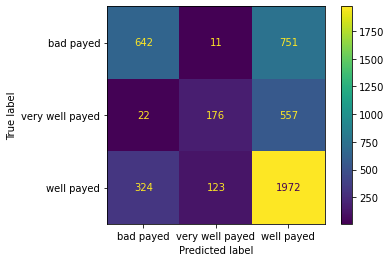

In [193]:
lr = LogisticRegression(tol=0.001, solver="saga", penalty="l1")
lr.fit(X_train_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1), y_train["payed"])
predictions = lr.predict(X_test_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1))
print(classification_report(y_true=y_test["payed"], y_pred=predictions))
cm = confusion_matrix(y_true=y_test["payed"], y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

                 precision    recall  f1-score   support

      bad payed       0.67      0.42      0.52      1404
very well payed       0.55      0.15      0.24       755
     well payed       0.59      0.85      0.70      2419

       accuracy                           0.61      4578
      macro avg       0.60      0.48      0.49      4578
   weighted avg       0.61      0.61      0.57      4578



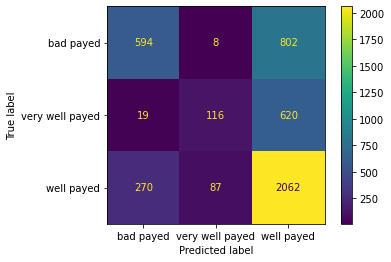

In [115]:
nn = MLPClassifier(
    hidden_layer_sizes=(10000,),
    activation="tanh",
    max_iter=1000,
    learning_rate="adaptive",
    
)
nn.fit(X_train_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1), y_train["payed"])
predictions = nn.predict(X_test_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1))
print(classification_report(y_true=y_test["payed"], y_pred=predictions))
cm = confusion_matrix(y_true=y_test["payed"], y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

                 precision    recall  f1-score   support

      bad payed       0.65      0.46      0.54      1404
very well payed       0.53      0.26      0.35       755
     well payed       0.60      0.80      0.69      2419

       accuracy                           0.61      4578
      macro avg       0.59      0.51      0.53      4578
   weighted avg       0.60      0.61      0.59      4578



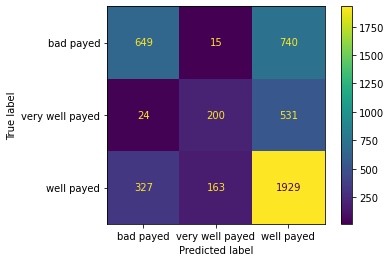

In [70]:
ad = AdaBoostClassifier()
ad.fit(X_train_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1), y_train["payed"])
predictions = ad.predict(X_test_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1))
print(classification_report(y_true=y_test["payed"], y_pred=predictions))
cm = confusion_matrix(y_true=y_test["payed"], y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

                 precision    recall  f1-score   support

      bad payed       0.66      0.35      0.45      1404
very well payed       0.53      0.10      0.16       755
     well payed       0.57      0.88      0.69      2419

       accuracy                           0.59      4578
      macro avg       0.59      0.44      0.44      4578
   weighted avg       0.59      0.59      0.53      4578



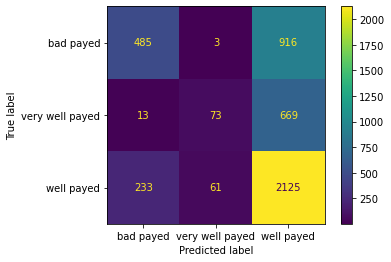

In [81]:
knn = KNeighborsClassifier(n_neighbors=279)
knn.fit(X_train_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1), y_train["payed"])
predictions = knn.predict(X_test_used.drop(["payed_bad payed", "payed_well payed", "payed_very well payed"], axis=1))
print(classification_report(y_true=y_test["payed"], y_pred=predictions))
cm = confusion_matrix(y_true=y_test["payed"], y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

In [41]:
X_test_used_2 = X_test.drop("payed", axis=1)
X_test_used_2["payed"] = predictions
X_test_used_2 = pd.get_dummies(X_test_used_2)
X_test_used_2

,cluster,how_old_are_you_18-24,how_old_are_you_25-34,how_old_are_you_35-44,how_old_are_you_45-54,how_old_are_you_55-64,how_old_are_you_65 or over,how_old_are_you_under 18,years_of_experience_in_field_1 year or less,years_of_experience_in_field_11 - 20 years,...,industry_Industry,industry_Law,industry_Non profit Organization,industry_Other,industry_Public & Government,industry_Technology & Science,industry_Unidentified,payed_bad payed,payed_very well payed,payed_well payed
16638,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
14459,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22552,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6264,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
18863,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,2,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9736,5,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
18610,3,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
22668,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train_used, y_train["harmonized_salary"])
predictions = linear.predict(X_test_used_2)
rmse = np.sqrt(mean_squared_error(y_true=y_test["harmonized_salary"], y_pred=predictions))
print(rmse)

32323.150869078097


In [43]:
tree = DecisionTreeRegressor()
tree.fit(X_train_used, y_train["harmonized_salary"])
predictions = tree.predict(X_test_used_2)
rmse = np.sqrt(mean_squared_error(y_true=y_test["harmonized_salary"], y_pred=predictions))
print(rmse)

33012.549493686216


In [54]:
random = RandomForestRegressor(n_estimators=200)
random.fit(X_train_used, y_train["harmonized_salary"])
predictions = random.predict(X_test_used_2)
rmse = np.sqrt(mean_squared_error(y_true=y_test["harmonized_salary"], y_pred=predictions))
print(rmse)

32367.193846319587


# Try other approach

In [160]:
df["payed2"] = df["harmonized_salary"].apply(
    lambda x: "well payed" if x >= df["harmonized_salary"].quantile(0.5) and x <= df["harmonized_salary"].quantile(0.75) else 
        "very well payed" if x >= df["harmonized_salary"].quantile(0.75) else
        "bad payed" if x >= df["harmonized_salary"].quantile(0.25) and x <= df["harmonized_salary"].quantile(0.5)
        else "very bad payed"
)

In [161]:
df["payed2"].value_counts()

well payed         5819
very well payed    5715
bad payed          5707
very bad payed     5647
Name: payed2, dtype: int64

<AxesSubplot:xlabel='payed2', ylabel='count'>

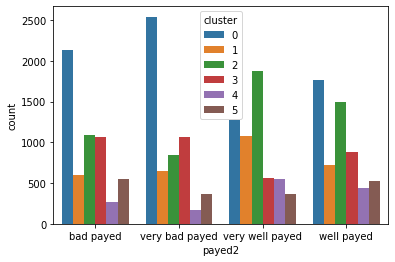

In [162]:
sns.countplot(data=df, x="payed2", hue="cluster")

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
    df[
        [
            "how_old_are_you",
            "years_of_experience_in_field",
            "highest_level_of_education_completed",
            "gender",
            "industry",
            "cluster",
            "payed2",
            #"adjusted_annual_salary",
        ]
    ],
    df[["payed2", "harmonized_salary"]],
    train_size=0.8,
    random_state=29
)
X_train_used = pd.get_dummies(X_train)
X_test_used = pd.get_dummies(X_test)

                 precision    recall  f1-score   support

      bad payed       0.34      0.26      0.30      1160
 very bad payed       0.49      0.57      0.53      1148
very well payed       0.49      0.60      0.54      1116
     well payed       0.35      0.30      0.32      1154

       accuracy                           0.43      4578
      macro avg       0.42      0.43      0.42      4578
   weighted avg       0.42      0.43      0.42      4578



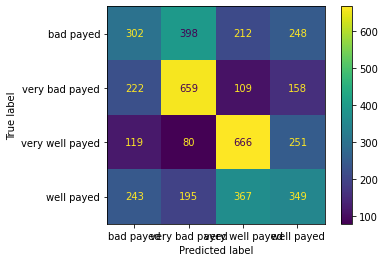

In [165]:
lr = LogisticRegression(max_iter=10000, solver="newton-cg")
lr.fit(X_train_used.drop(["payed2_bad payed", "payed2_well payed", "payed2_very bad payed", "payed2_very well payed"], axis=1), y_train["payed2"])
predictions = lr.predict(X_test_used.drop(["payed2_bad payed", "payed2_well payed", "payed2_very bad payed", "payed2_very well payed"], axis=1))
print(classification_report(y_true=y_test["payed2"], y_pred=predictions))
cm = confusion_matrix(y_true=y_test["payed2"], y_pred=predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

In [166]:
X_test_used_2 = X_test.drop("payed2", axis=1)
X_test_used_2["payed2"] = predictions
X_test_used_2 = pd.get_dummies(X_test_used_2)
X_test_used_2

,cluster,how_old_are_you_18-24,how_old_are_you_25-34,how_old_are_you_35-44,how_old_are_you_45-54,how_old_are_you_55-64,how_old_are_you_65 or over,how_old_are_you_under 18,years_of_experience_in_field_1 year or less,years_of_experience_in_field_11 - 20 years,...,industry_Law,industry_Non profit Organization,industry_Other,industry_Public & Government,industry_Technology & Science,industry_Unidentified,payed2_bad payed,payed2_very bad payed,payed2_very well payed,payed2_well payed
16638,2,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14459,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22552,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6264,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18863,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,2,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9736,5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18610,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22668,3,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [169]:
linear = LinearRegression(fit_intercept=False)
linear.fit(X_train_used, y_train["harmonized_salary"])
predictions = linear.predict(X_test_used)
rmse = np.sqrt(mean_squared_error(y_true=y_test["harmonized_salary"], y_pred=predictions))
print(rmse)

12863.516852098364


In [150]:
random = RandomForestRegressor(n_estimators=200)
random.fit(X_train_used, y_train["harmonized_salary"])
predictions = random.predict(X_test_used_2)
rmse = np.sqrt(mean_squared_error(y_true=y_test["harmonized_salary"], y_pred=predictions))
print(rmse)

35492.458990151354
